In [47]:
import pandas as pd

df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

for index, row in df_main.iterrows():
    if 'secon' in row['identificator'].lower():
        print(row['Amides for LogP'], row['Framework'], row['F group'])

O=C(c1ccccc1)N1CC2CC1(C(F)(F)F)C2 bicyclo[2.1.1]hexane CF3
O=C(c1ccccc1)N1CCCC1C(F)(F)F cyclopentane CF3
O=C(c1ccccc1)N1CC2CC1C2 bicyclo[2.1.1]hexane non-F
O=C(c1ccccc1)N1CCCC1 cyclopentane non-F
CC12CC(CN1C(=O)c1ccccc1)C2 bicyclo[2.1.1]hexane non-F
O=C(c1ccccc1)N1CC2CCC1(C(F)(F)F)C2 bicyclo[2.2.1]heptane CF3
O=C(c1ccccc1)N1CC2CCC1(C(F)(F)F)CC2 bicyclo[2.2.2]octane CF3
O=C(c1ccccc1)N1CCCCC1C(F)(F)F cyclohexane CF3
O=C(c1ccccc1)N1CC2CCC1C2 bicyclo[2.2.1]heptane non-F
CC12CCC(CC1)CN2C(=O)c1ccccc1 bicyclo[2.2.2]octane non-F
O=C(c1ccccc1)N1CC2CCC1CC2 bicyclo[2.2.2]octane non-F
O=C(c1ccccc1)N1CCCCC1 cyclohexane non-F
O=C(c1ccccc1)N1CC2CCCC1(C(F)(F)F)C2 bicyclo[3.2.1]octane CF3
O=C(c1ccccc1)N1CC2CCCC1C2 bicyclo[3.2.1]octane non-F
CC12CCCC(CN1C(=O)c1ccccc1)C2 bicyclo[3.2.1]octane non-F
O=C(c1ccccc1)N1CC2CC(C1)CC(F)(F)C2 bicyclo[3.3.1]nonane gem-CF2
O=C(c1ccccc1)N1CC2CC(F)(F)CC(C1)C2(F)F bicyclo[3.3.1]nonane gem-CF2
O=C(c1ccccc1)N1CC2CCCC(C1)C2(F)F bicyclo[3.3.1]nonane gem-CF2
O=C(c1ccccc1)N1C

In [48]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES

In [49]:
"""atom sum relevance in fluorine group withour hydrogens, not scaled, SME relevance with nitrogen in same subgroup"""
relevances_fluorine = {'O=C(Nc1ccccc1)C1CCC(F)(F)CC1': 0.13, 'O=C(Nc1ccccc1)C1CCCCC1': 0.41270744800567627, 'O=C(Nc1ccccc1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.7372466325759888, 'O=C(Nc1ccccc1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.9184175133705139, 'O=C(Nc1ccccc1)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.29, 'O=C(Nc1ccccc1)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.204, 'O=C(Nc1ccccc1)C1CCC1': 0.25197094678878784, 'O=C(Nc1ccccc1)C1(CF)CCC1': -0.028, 'O=C(Nc1ccccc1)C1(C(F)F)CCC1': 0.209, 'O=C(Nc1ccccc1)C1(C(F)(F)F)CCC1': 0.271, 'O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)(F)F)C1': 0.383, 'O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)(F)F)C1': 0.383, 'O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)F)C1': 0.11, 'O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)F)C1': 0.11, 'O=C(Nc1ccccc1)[C@H]1C[C@H](CF)C1': -0.106, 'O=C(Nc1ccccc1)[C@H]1C[C@@H](CF)C1': -0.106, 'O=C(Nc1ccccc1)C1CC1(F)F': 0.147, 'O=C(Nc1ccccc1)C1CCC1(F)F': 0.104, 'O=C(Nc1ccccc1)C1CC(F)(F)C1': 0.049, 'O=C(Nc1ccccc1)C1CCCC1(F)F': 0.145, 'O=C(Nc1ccccc1)C1CCC(F)(F)C1': 0.237, 'O=C(Nc1ccccc1)C1CCCCC1(F)F': 0.149, 'O=C(Nc1ccccc1)C1CCCC(F)(F)C1': 0.225, 'O=C(Nc1ccccc1)C1CCCCCC1(F)F': 0.155, 'O=C(Nc1ccccc1)C1CCCCC(F)(F)C1': 0.244, 'O=C(Nc1ccccc1)C1CCCC(F)(F)CC1': 0.283, 'CCC(F)(F)CC(=O)Nc1ccccc1': 0.141, 'CC(F)(F)CCC(=O)Nc1ccccc1': 0.003, 'O=C(CCCC(F)F)Nc1ccccc1': 0.067, 'O=C(Nc1ccccc1)C1CC1': 0.0577278733253479, 'O=C(Nc1ccccc1)C1CCCC1': 0.365840345621109, 'O=C(Nc1ccccc1)C1CCCCCC1': 0.6409776210784912, 'CCCCC(=O)Nc1ccccc1': 0.2744596004486084, 'O=C(Nc1ccccc1)C1CC2(CCC2)C1': 0.2386067807674408, 'O=C(Nc1ccccc1)C1CC2(CC(F)C2)C1': 0.224, 'O=C(Nc1ccccc1)C1CC2(C1)CC(F)(F)C2': 0.124, 'O=C(Nc1ccccc1)C12CC(C(F)(F)F)(CO1)C2': 0.212, 'O=C(Nc1ccccc1)C12CC(C(F)F)(CO1)C2': 0.119, 'O=C(Nc1ccccc1)C12CC(CO1)C2': -0.1734972894191742, 'O=C(Nc1ccccc1)c1ccccc1': 0.20527347922325134, 'O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)(F)F': 0.576, 'O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)F': 0.037, 'O=C(Nc1ccccc1)[C@@H]1CC[C@H]1CF': 0.044, 'O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)(F)F': 0.582, 'O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)(F)F': 0.51, 'O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)F': 0.065, 'O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)F': 0.097, 'O=C(Nc1ccccc1)[C@@H]1C[C@H]1CF': 0.018, 'C[C@@H]1C[C@H]1C(=O)Nc1ccccc1': 0.24839764833450317, 'C[C@@H]1C[C@@H]1C(=O)Nc1ccccc1': 0.42546308040618896, 'O=C(Nc1ccccc1)[C@@H]1C[C@@H]1CF': 0.02, 'O=C(Nc1ccccc1)C1CC12CC2': 0.4354594945907593, 'O=C(Nc1ccccc1)C1C(F)(F)C12CC2': 0.04, 'O=C(Nc1ccccc1)C1CC12CC2(F)F': 0.198}

cyclopropane = {1: {'H': [0.06]}, 2: {'H': [0.06]}}
cyclobutane = {1: {'H': [0.25]}, 2: {'H': [0.25]}, 3: {'H': [0.25]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {'H': [0.37]}, 2: {'H': [0.37]}, 3: {'H': [0.37]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {'H': [0.12]}, 2: {'H': [0.12]}, 3: {'H': [0.12]}, 4: {'H': [0.12]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {'H': [0.64]}, 2: {'H': [0.64]}, 3: {'H': [0.64]}, 4: {'H': [0.64]}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""atom sum relevance in fluorine group withour hydrogens, not scaled, SME relevance with nitrogen in different subgroups"""
# relevances_fluorine = {'O=C(Nc1ccccc1)C1CCC(F)(F)CC1': 0.164, 'O=C(Nc1ccccc1)C1CCCCC1': 0.453363299369812, 'O=C(Nc1ccccc1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.8491607904434204, 'O=C(Nc1ccccc1)[C@@H]1C[C@@H]2C[C@@H]2C1': 1.0364373922348022, 'O=C(Nc1ccccc1)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.301, 'O=C(Nc1ccccc1)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.203, 'O=C(Nc1ccccc1)C1CCC1': 0.48187750577926636, 'O=C(Nc1ccccc1)C1(CF)CCC1': -0.029, 'O=C(Nc1ccccc1)C1(C(F)F)CCC1': 0.23, 'O=C(Nc1ccccc1)C1(C(F)(F)F)CCC1': 0.272, 'O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)(F)F)C1': 0.406, 'O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)(F)F)C1': 0.406, 'O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)F)C1': 0.173, 'O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)F)C1': 0.173, 'O=C(Nc1ccccc1)[C@H]1C[C@H](CF)C1': -0.027, 'O=C(Nc1ccccc1)[C@H]1C[C@@H](CF)C1': -0.027, 'O=C(Nc1ccccc1)C1CC1(F)F': 0.11, 'O=C(Nc1ccccc1)C1CCC1(F)F': 0.11, 'O=C(Nc1ccccc1)C1CC(F)(F)C1': 0.127, 'O=C(Nc1ccccc1)C1CCCC1(F)F': 0.105, 'O=C(Nc1ccccc1)C1CCC(F)(F)C1': 0.228, 'O=C(Nc1ccccc1)C1CCCCC1(F)F': 0.109, 'O=C(Nc1ccccc1)C1CCCC(F)(F)C1': 0.196, 'O=C(Nc1ccccc1)C1CCCCCC1(F)F': 0.116, 'O=C(Nc1ccccc1)C1CCCCC(F)(F)C1': 0.215, 'O=C(Nc1ccccc1)C1CCCC(F)(F)CC1': 0.261, 'CCC(F)(F)CC(=O)Nc1ccccc1': 0.152, 'CC(F)(F)CCC(=O)Nc1ccccc1': 0.042, 'O=C(CCCC(F)F)Nc1ccccc1': 0.138, 'O=C(Nc1ccccc1)C1CC1': 0.28657621145248413, 'O=C(Nc1ccccc1)C1CCCC1': 0.5957469344139099, 'O=C(Nc1ccccc1)C1CCCCCC1': 0.42841631174087524, 'CCCCC(=O)Nc1ccccc1': 0.3896028995513916, 'O=C(Nc1ccccc1)C1CC2(CCC2)C1': 0.332763135433197, 'O=C(Nc1ccccc1)C1CC2(CC(F)C2)C1': 0.332, 'O=C(Nc1ccccc1)C1CC2(C1)CC(F)(F)C2': 0.159, 'O=C(Nc1ccccc1)C12CC(C(F)(F)F)(CO1)C2': 0.226, 'O=C(Nc1ccccc1)C12CC(C(F)F)(CO1)C2': 0.125, 'O=C(Nc1ccccc1)C12CC(CO1)C2': -0.17469117045402527, 'O=C(Nc1ccccc1)c1ccccc1': 0.20527347922325134, 'O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)(F)F': 0.579, 'O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)F': 0.072, 'O=C(Nc1ccccc1)[C@@H]1CC[C@H]1CF': 0.086, 'O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)(F)F': 0.586, 'O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)(F)F': 0.513, 'O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)F': 0.086, 'O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)F': 0.112, 'O=C(Nc1ccccc1)[C@@H]1C[C@H]1CF': 0.042, 'C[C@@H]1C[C@H]1C(=O)Nc1ccccc1': 0.31798645853996277, 'C[C@@H]1C[C@@H]1C(=O)Nc1ccccc1': 0.5023335814476013, 'O=C(Nc1ccccc1)[C@@H]1C[C@@H]1CF': 0.069, 'O=C(Nc1ccccc1)C1CC12CC2': 0.4411413371562958, 'O=C(Nc1ccccc1)C1C(F)(F)C12CC2': 0.022, 'O=C(Nc1ccccc1)C1CC12CC2(F)F': 0.183}

# cyclopropane = {1: {'H': [0.06]}, 2: {'H': [0.06]}}
# cyclobutane = {1: {'H': [0.25]}, 2: {'H': [0.25]}, 3: {'H': [0.25]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.37]}, 2: {'H': [0.37]}, 3: {'H': [0.37]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.12]}, 2: {'H': [0.12]}, 3: {'H': [0.12]}, 4: {'H': [0.12]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# cycloheptane = {1: {'H': [0.64]}, 2: {'H': [0.64]}, 3: {'H': [0.64]}, 4: {'H': [0.64]}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
# methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles = train_test_smiles_data()

In [50]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [51]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen - 1

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen, SMILES_to_cycle_type[SMILES])

O=C(Nc1ccccc1)C1CCC(F)(F)CC1 ((12, 13), (12, 14)) gem-CF2 5 cyclohexane
O=C(Nc1ccccc1)C1CCCCC1 () non-F inf cyclohexane
O=C(Nc1ccccc1)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(Nc1ccccc1)[C@@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(Nc1ccccc1)[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((14, 15), (14, 16)) gem-CF2 5 bicyclo[3.1.0]hexane
O=C(Nc1ccccc1)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((14, 15), (14, 16)) gem-CF2 5 bicyclo[3.1.0]hexane
O=C(Nc1ccccc1)C1CCC1 () non-F inf cyclobutane
O=C(Nc1ccccc1)C1(CF)CCC1 ((9, 10, 11),) CH2F 2 cyclobutane
O=C(Nc1ccccc1)C1(C(F)F)CCC1 ((9, 10, 11, 12),) CHF2 2 cyclobutane
O=C(Nc1ccccc1)C1(C(F)(F)F)CCC1 ((9, 10, 11, 12, 13),) CF3 2 cyclobutane
O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)(F)F)C1 ((11, 12, 13, 14, 15),) CF3 4 cyclobutane
O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)(F)F)C1 ((11, 12, 13, 14, 15),) CF3 4 cyclobutane
O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)F)C1 ((11, 12, 13, 14),) CHF2 4 cyclobutane
O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)F)C1 ((11, 12, 13, 14),) CH

cyclobutane CH2F O=C(Nc1ccccc1)C1(CF)CCC1 1.88 -0.028
cyclobutane CHF2 O=C(Nc1ccccc1)C1(C(F)F)CCC1 2.19 0.209
cyclobutane CF3 O=C(Nc1ccccc1)C1(C(F)(F)F)CCC1 2.51 0.271
['H'] [0.06] [1.13]
['H', 'CH2F', 'CHF2', 'CF3'] [0.25, -0.028, 0.209, 0.271] [1.13, 1.88, 2.19, 2.51]
['H'] [0.37] [1.19]
['H'] [0.12] [1.39]
[] [] []


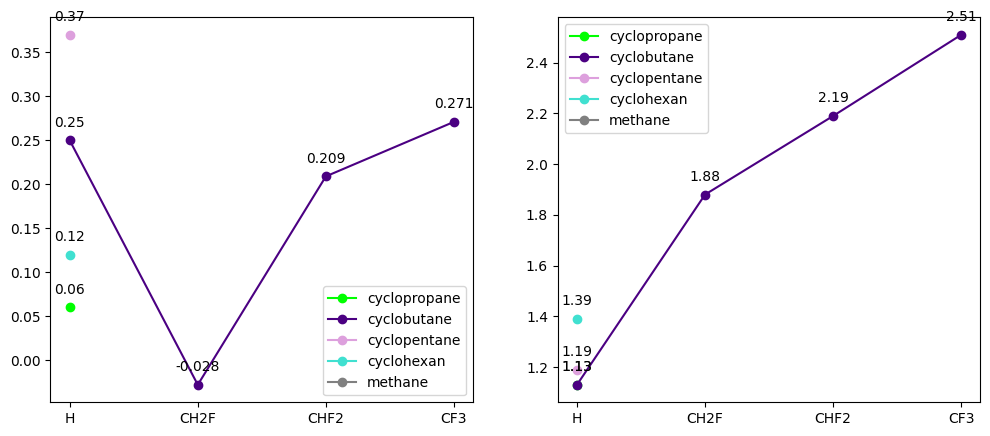

cyclopropane gem-CF2 O=C(Nc1ccccc1)C1CC1(F)F 2.07 0.147
cyclobutane gem-CF2 O=C(Nc1ccccc1)C1CCC1(F)F 2.03 0.104
cyclopentane gem-CF2 O=C(Nc1ccccc1)C1CCCC1(F)F 2.25 0.145
cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCCCC1(F)F 2.5 0.149
methane gem-CF2 CCC(F)(F)CC(=O)Nc1ccccc1 2.26 0.141
cyclobutane CF3 O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)(F)F 2.88 0.576
cyclobutane CHF2 O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)F 2.22 0.037
cyclobutane CH2F O=C(Nc1ccccc1)[C@@H]1CC[C@H]1CF 2.11 0.044
cyclopropane CF3 O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)(F)F 2.98 0.582
cyclopropane CF3 O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)(F)F 2.12 0.51
cyclopropane CHF2 O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)F 2.28 0.065
cyclopropane CHF2 O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)F 2.35 0.097
cyclopropane CH2F O=C(Nc1ccccc1)[C@@H]1C[C@H]1CF 1.12 0.018
cyclopropane CH2F O=C(Nc1ccccc1)[C@@H]1C[C@@H]1CF 1.88 0.02
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [0.06, 0.02, 0.147, 0.097, 0.51] [1.13, 1.88, 2.07, 2.35, 2.12]
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [0.25, 0.044, 0.

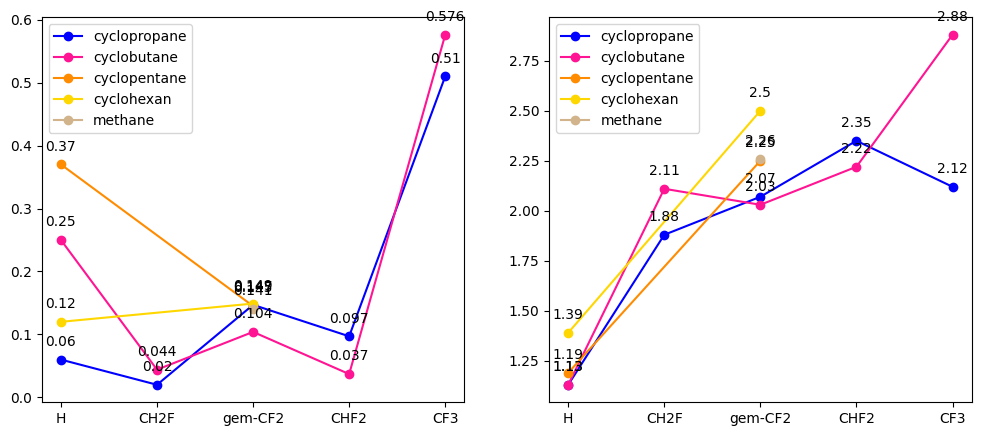

cyclobutane CF3 O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)(F)F)C1 3.02 0.383
cyclobutane CF3 O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)(F)F)C1 2.72 0.383
cyclobutane CHF2 O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)F)C1 2.39 0.11
cyclobutane CHF2 O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)F)C1 2.23 0.11
cyclobutane CH2F O=C(Nc1ccccc1)[C@H]1C[C@H](CF)C1 2.14 -0.106
cyclobutane CH2F O=C(Nc1ccccc1)[C@H]1C[C@@H](CF)C1 1.96 -0.106
cyclobutane gem-CF2 O=C(Nc1ccccc1)C1CC(F)(F)C1 2.26 0.049
cyclopentane gem-CF2 O=C(Nc1ccccc1)C1CCC(F)(F)C1 2.5 0.237
cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCCC(F)(F)C1 2.72 0.225
methane gem-CF2 CC(F)(F)CCC(=O)Nc1ccccc1 2.12 0.003
methane CHF2 O=C(CCCC(F)F)Nc1ccccc1 2.06 0.067
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [0.25, -0.106, 0.049, 0.11, 0.383] [1.13, 1.96, 2.26, 2.23, 2.72]
['H', 'gem-CF2'] [0.37, 0.237] [1.13, 2.5]
['H', 'gem-CF2'] [0.12, 0.225] [1.39, 2.72]
['gem-CF2', 'CHF2'] [0.003, 0.067] [2.12, 2.06]


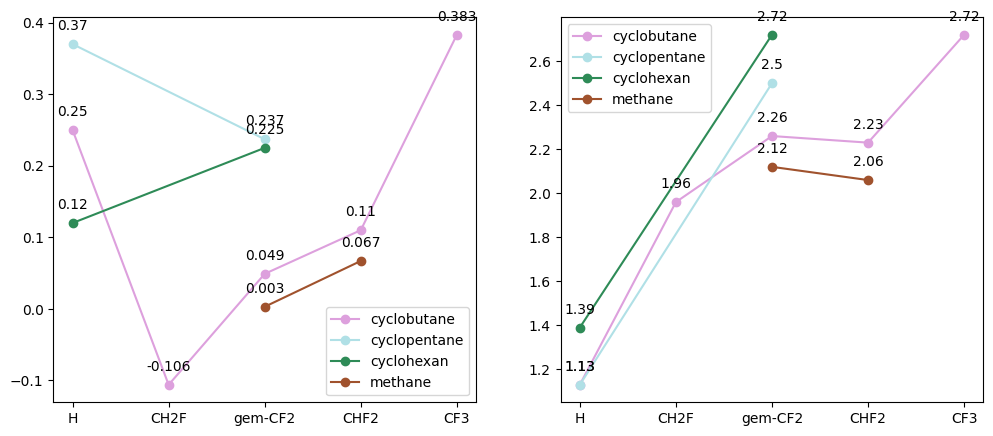

cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCC(F)(F)CC1 2.63 0.13
['H', 'gem-CF2'] [0.12, 0.13] [1.39, 2.63]


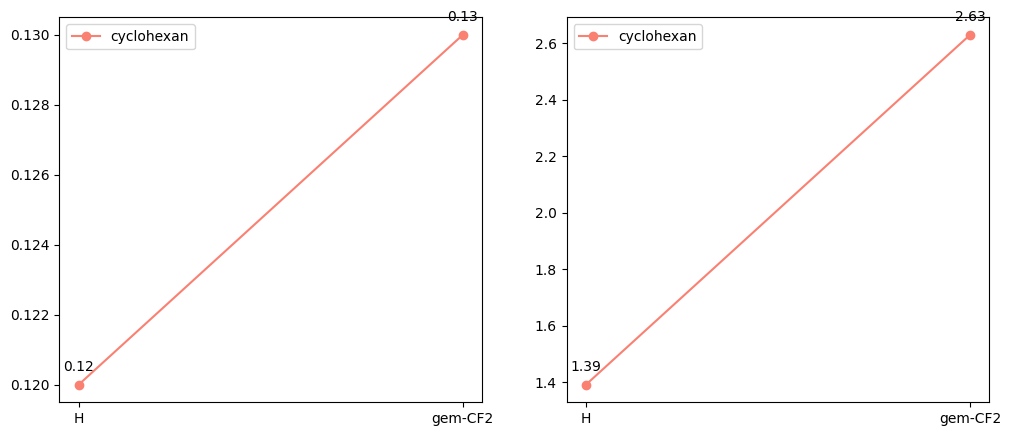

In [52]:
import matplotlib.pyplot as plt

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}}
cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}, 3: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}, 3: {'H': [1.13]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}, 4: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(1, 5):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)]:
        X, y_relevance, y_logP = [], [], []
        if distance_global not in molecule_group:
            continue
        
        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue

            X.append(f_group_optimal)
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X, y_relevance, y_logP)
        ax1.plot(X, y_relevance, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax1.annotate(f"{str(y_relevance[i])}", (X[i], y_relevance[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.plot(X, y_logP, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax2.annotate(f"{str(y_logP[i])}", (X[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()

    plt.show()
    
    


cyclobutane CH2F O=C(Nc1ccccc1)C1(CF)CCC1 1.88 -0.028
cyclobutane CHF2 O=C(Nc1ccccc1)C1(C(F)F)CCC1 2.19 0.209
cyclobutane CF3 O=C(Nc1ccccc1)C1(C(F)(F)F)CCC1 2.51 0.271
['H'] [0.06]
['H', 'CH2F', 'CHF2', 'CF3'] [0.25, -0.028, 0.209, 0.271]
['H'] [0.37]
['H'] [0.12]
['H'] [0.64]
[] []
['H', 'CH2F', 'CHF2', 'CF3'] [[0.06, 0.25, 0.37, 0.12, 0.64], [-0.028], [0.209], [0.271]]


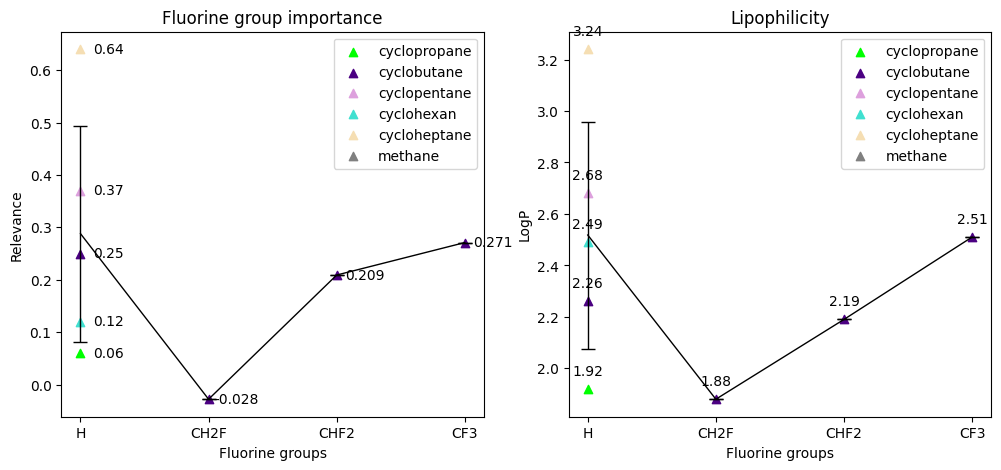

cyclopropane gem-CF2 O=C(Nc1ccccc1)C1CC1(F)F 2.07 0.147
cyclobutane gem-CF2 O=C(Nc1ccccc1)C1CCC1(F)F 2.03 0.104
cyclopentane gem-CF2 O=C(Nc1ccccc1)C1CCCC1(F)F 2.25 0.145
cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCCCC1(F)F 2.5 0.149
cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCCCCC1(F)F 2.9 0.155
methane gem-CF2 CCC(F)(F)CC(=O)Nc1ccccc1 2.26 0.141
cyclobutane CF3 O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)(F)F 2.88 0.576
cyclobutane CHF2 O=C(Nc1ccccc1)[C@@H]1CC[C@H]1C(F)F 2.22 0.037
cyclobutane CH2F O=C(Nc1ccccc1)[C@@H]1CC[C@H]1CF 2.11 0.044
cyclopropane CF3 O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)(F)F 2.98 0.582
cyclopropane CF3 O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)(F)F 2.12 0.51
cyclopropane CHF2 O=C(Nc1ccccc1)[C@@H]1C[C@H]1C(F)F 2.28 0.065
cyclopropane CHF2 O=C(Nc1ccccc1)[C@H]1C[C@H]1C(F)F 2.35 0.097
cyclopropane CH2F O=C(Nc1ccccc1)[C@@H]1C[C@H]1CF 1.12 0.018
cyclopropane CH2F O=C(Nc1ccccc1)[C@@H]1C[C@@H]1CF 1.88 0.02
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [0.06, 0.02, 0.147, 0.097, 0.51]
['H', 'CH2F', 'gem-CF2', 'CHF

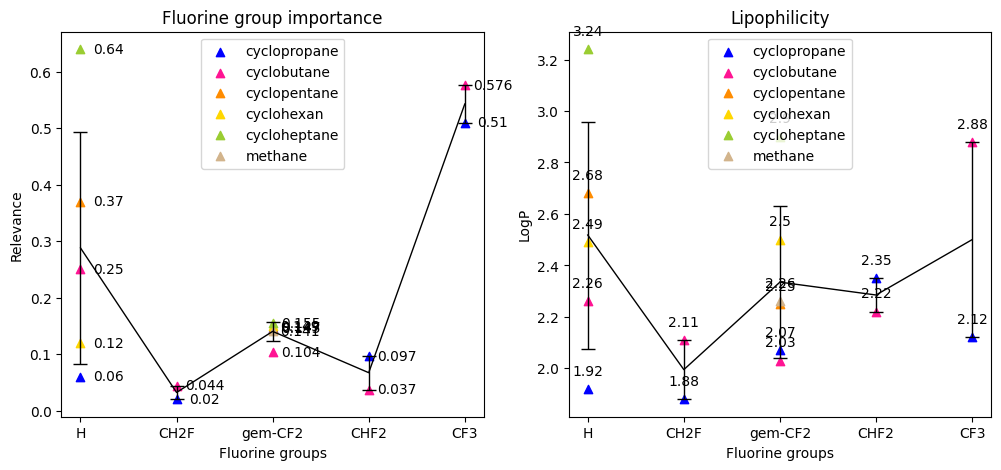

cyclobutane CF3 O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)(F)F)C1 3.02 0.383
cyclobutane CF3 O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)(F)F)C1 2.72 0.383
cyclobutane CHF2 O=C(Nc1ccccc1)[C@H]1C[C@H](C(F)F)C1 2.39 0.11
cyclobutane CHF2 O=C(Nc1ccccc1)[C@H]1C[C@@H](C(F)F)C1 2.23 0.11
cyclobutane CH2F O=C(Nc1ccccc1)[C@H]1C[C@H](CF)C1 2.14 -0.106
cyclobutane CH2F O=C(Nc1ccccc1)[C@H]1C[C@@H](CF)C1 1.96 -0.106
cyclobutane gem-CF2 O=C(Nc1ccccc1)C1CC(F)(F)C1 2.26 0.049
cyclopentane gem-CF2 O=C(Nc1ccccc1)C1CCC(F)(F)C1 2.5 0.237
cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCCC(F)(F)C1 2.72 0.225
cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCCCC(F)(F)C1 3.03 0.244
methane gem-CF2 CC(F)(F)CCC(=O)Nc1ccccc1 2.12 0.003
methane CHF2 O=C(CCCC(F)F)Nc1ccccc1 2.06 0.067
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [0.25, -0.106, 0.049, 0.11, 0.383]
['H', 'gem-CF2'] [0.37, 0.237]
['H', 'gem-CF2'] [0.12, 0.225]
['H', 'gem-CF2'] [0.64, 0.244]
['gem-CF2', 'CHF2'] [0.003, 0.067]
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [[0.25, 0.37, 0.12, 0.64], [-0.106]

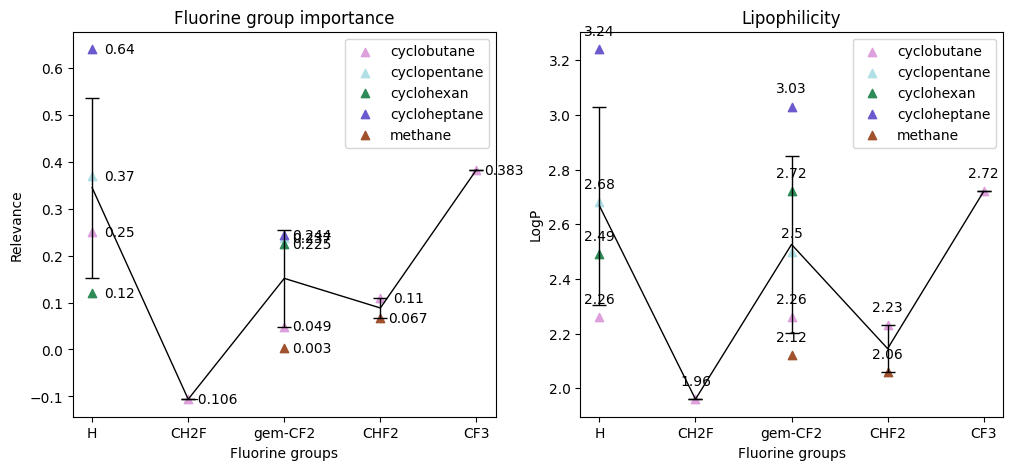

cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCC(F)(F)CC1 2.63 0.13
cyclohexane gem-CF2 O=C(Nc1ccccc1)C1CCCC(F)(F)CC1 2.95 0.283
['H', 'gem-CF2'] [0.12, 0.13]
['H', 'gem-CF2'] [0.64, 0.283]
['H', 'gem-CF2'] [[0.12, 0.64], [0.13, 0.283]]


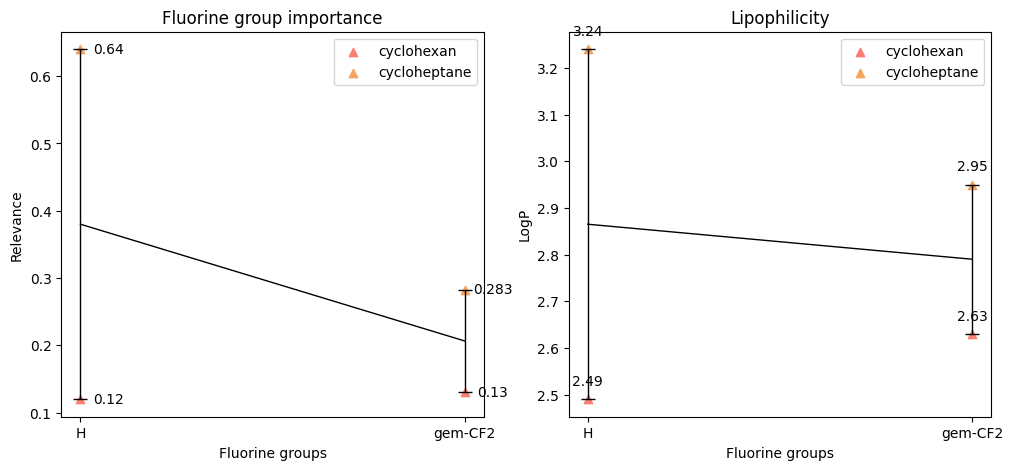

In [53]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.92]}, 2: {'H': [1.92]}}
cyclobutane_logP = {1: {'H': [2.26]}, 2: {'H': [2.26]}, 3: {'H': [2.26]}}
cyclopentane_logP = {1: {'H': [2.68]}, 2: {'H': [2.68]}, 3: {'H': [2.68]}}
cyclohexan_logP = {1: {'H': [2.49]}, 2: {'H': [2.49]}, 3: {'H': [2.49]}, 4: {'H': [2.49]}}
cycloheptane_logP = {1: {'H': [3.24]}, 2: {'H': [3.24]}, 3: {'H': [3.24]}, 4: {'H': [3.24]}}
methane_logP = {1: {}, 2: {}, 3: {}}

for distance_global in range(1, 5):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    
